In [1]:
import pandas as pd # DataFrame, Series
import numpy as np # Scienitific computing packages - Array

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

# Seasonal Crime Contrast

In [2]:
data = pd.read_csv('./classification_dataset.csv')

In [5]:
data.head()

,Neighborhood,Is_Traffic,Is_fatal,Is_nighttime,Crime_type,Is_american_holiday,Is_canadian_holiday,Month,City,Season
0,montbello,False,False,True,Theft,False,False,10,Denver,Fall
1,northeast-park-hill,True,False,True,Traffic Accident,False,False,1,Denver,Winter
2,montbello,True,False,True,Traffic Accident,False,False,1,Denver,Winter
3,montbello,False,False,True,Offence Against a Person,False,False,1,Denver,Winter
4,lincoln-park,False,False,True,Theft of Vehicle,False,False,1,Denver,Winter


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660763 entries, 0 to 660762
Data columns (total 10 columns):
Neighborhood           643581 non-null object
Is_Traffic             660763 non-null bool
Is_fatal               660763 non-null bool
Is_nighttime           660763 non-null bool
Crime_type             660763 non-null object
Is_american_holiday    660763 non-null bool
Is_canadian_holiday    660763 non-null bool
Month                  660763 non-null int64
City                   660763 non-null object
Season                 660763 non-null object
dtypes: bool(5), int64(1), object(4)
memory usage: 28.4+ MB


In [7]:
train, test = train_test_split(data, test_size = 0.3)

In [9]:
train.shape

(462534, 10)

In [16]:
# Custom Colour Palette
red_blue = ["#19B5FE", "#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

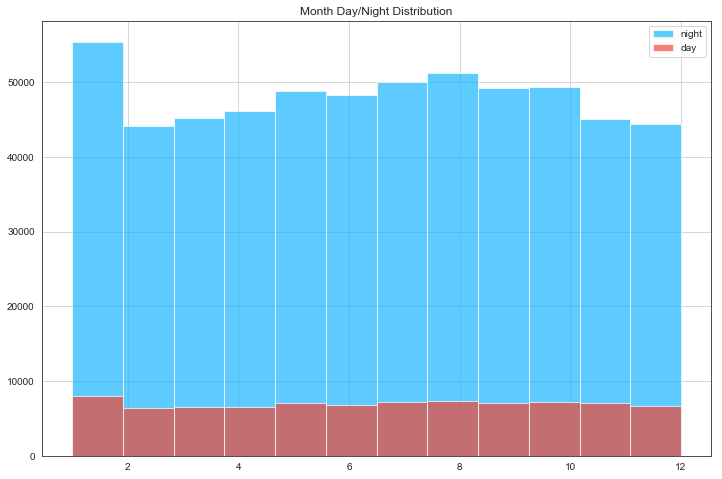

In [19]:
night_month = data[data['Is_nighttime'] == True]['Month']
day_month = data[data['Is_nighttime'] == False]['Month']

fig = plt.figure(figsize=(12,8))
plt.title("Month Day/Night Distribution")
night_month.hist(alpha = 0.7, bins = 12, label='night')
day_month.hist(alpha = 0.7, bins = 12, label='day')
plt.legend(loc = "upper right")

In [20]:
night_month

0         10
1          1
2          1
3          1
4          1
5          1
6         10
7          4
8          4
9          4
10         1
11         1
12         1
13         8
14         3
15         3
16         2
17         2
18         2
19        12
20        11
21         1
22         2
23        11
24         1
25         1
26         1
27         1
28         1
29         1
          ..
660697    12
660700     9
660704     7
660707     1
660708    12
660712     5
660714     9
660716     8
660718    12
660719     3
660721     7
660724     3
660725     4
660726     2
660727     5
660728     2
660730     4
660733    11
660738     1
660741     3
660742    11
660743     3
660744     7
660747     2
660748    12
660749     7
660751    10
660752     1
660757     1
660758     7
Name: Month, Length: 576886, dtype: int64

In [21]:
c = DecisionTreeClassifier(min_samples_split = 100)

In [25]:
features = ["Is_Traffic", "Is_fatal", "Is_nighttime", "Crime_type", "Is_american_holiday", "Is_canadian_holiday", "Month", "City", "Season"]

In [26]:
x_train = train[features]
y_train = train["Month"]

x_test = test[features]
y_text = test["Month"]

In [27]:
dt = c.fit(x_train, y_train)

ValueError: could not convert string to float: 'Other Crimes'